In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = pd.read_csv('data/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


#### seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
Show point estimates and confidence intervals as rectangular bars.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


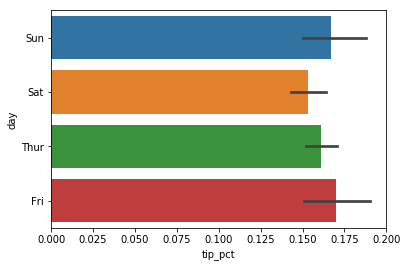

In [5]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

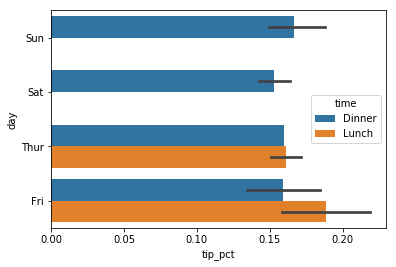

In [6]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

#### seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
Plot data and a linear regression model fit.

#### ci = confidence interval

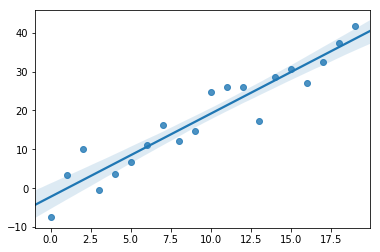

In [7]:
x = np.arange(20)
y = x * 2 + 1 + np.random.randn(20) * 5

sns.regplot(x, y, ci=90)

#### seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
Figure-level interface for drawing categorical plots onto a FacetGrid.

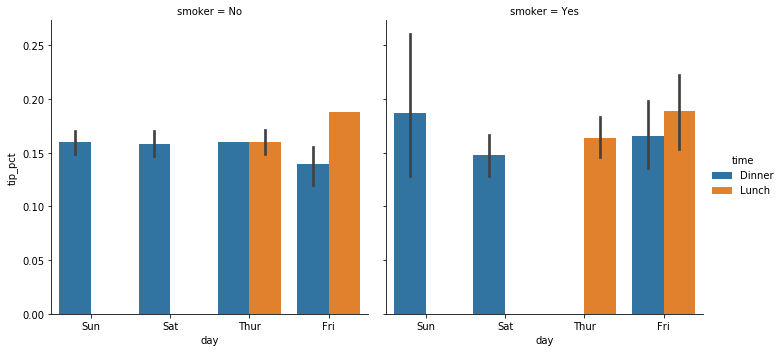

In [8]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips)

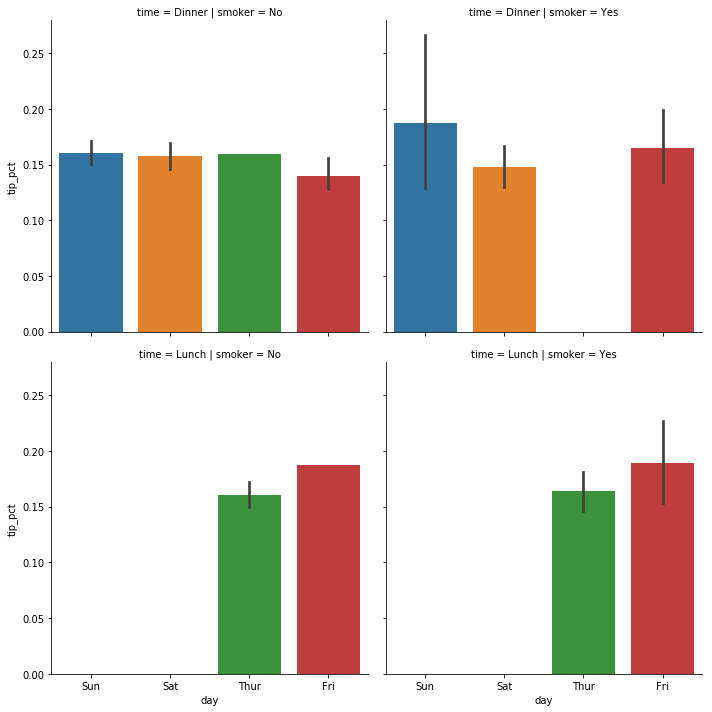

In [9]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips)

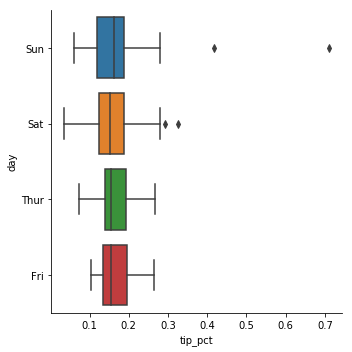

In [10]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips)

#### matplotlib.pyplot.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, *, data=None)
Make a box and whisker plot.

(0, 12)

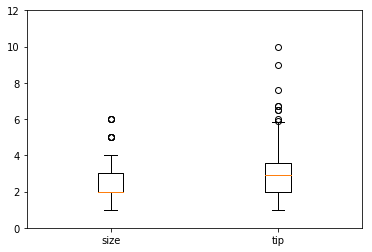

In [11]:
plt.boxplot([tips['size'], tips['tip']])
plt.xticks([1, 2], ['size', 'tip'])
plt.ylim(0, 12)

#### sns.load_dataset
#### sns.pairplot

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


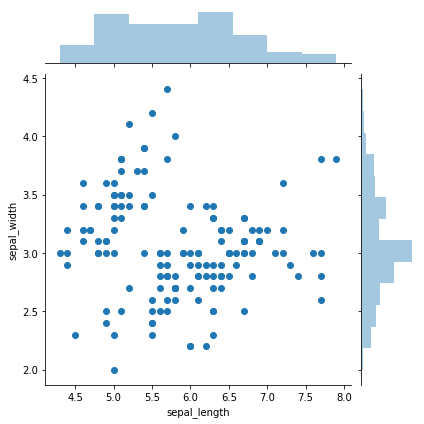

In [13]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)

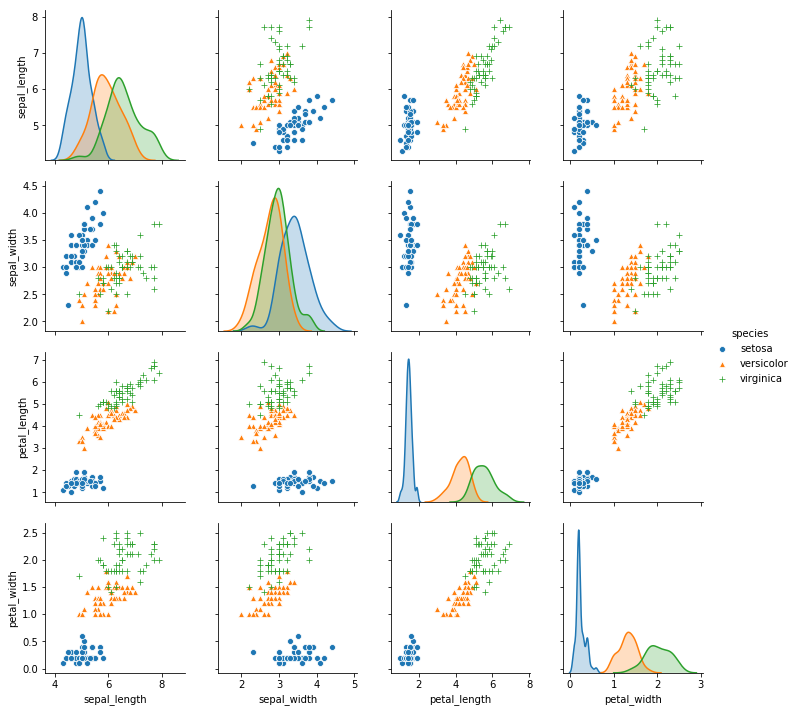

In [14]:
sns.pairplot(iris, diag_kind='kde', hue='species', markers=['o', '^', '+'])

#### (Don't worry about sklearn for now)

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from sklearn.svm import SVC
clf = SVC(gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Score of training set: {clf.score(X_train, y_train):.2f}')
print(f'Score of test set: {clf.score(X_test, y_test):.2f}')

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Score of training set: 1.00
Score of test set: 0.99


#### sns.heatmap

Text(33.0, 0.5, 'predict label')

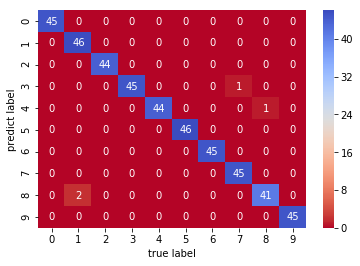

In [16]:
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.coolwarm_r)
plt.xlabel('true label')
plt.ylabel('predict label')